In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\miran\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Initial data import

In [ ]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

### Fundamental distributions

In [9]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

C:\Users\miran\AppData\Local\Temp\ipykernel_7124\2640694134.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


In [13]:
data['Month'] = pd.to_datetime(data['CRASH DATE']).dt.month
data['Day'] = pd.to_datetime(data['CRASH DATE']).dt.day

In [10]:
file_weather = 'C:/Users/miran/Danmarks Tekniske Universitet/DTU/Master/3semester/Social data/NYC_Central_Park_weather_1869-2022.csv'
weather_data = pd.read_csv(file_weather)
weather_data['DATE'] = pd.to_datetime(weather_data['DATE'], format='%Y-%m-%d')
weather_data['Year'] = weather_data['DATE'].dt.year
weather_data['Month'] = weather_data['DATE'].dt.month
weather_data['Day'] = weather_data['DATE'].dt.day
weather_data = weather_data[(weather_data['Year'] > 2012) & (weather_data['Year'] < 2025)]

In [11]:
#Print size of the data
#print(data.shape)
print(weather_data.shape)

(3650, 9)


In [22]:
print(weather_data)

            DATE  PRCP  SNOW  SNWD  TMIN  TMAX  Year  Month  Day
52595 2013-01-01   0.0   0.0   0.0  26.0  40.0  2013      1    1
52596 2013-01-02   0.0   0.0   0.0  22.0  33.0  2013      1    2
52597 2013-01-03   0.0   0.0   0.0  24.0  32.0  2013      1    3
52598 2013-01-04   0.0   0.0   0.0  30.0  37.0  2013      1    4
52599 2013-01-05   0.0   0.0   0.0  32.0  42.0  2013      1    5
...          ...   ...   ...   ...   ...   ...   ...    ...  ...
56240 2022-12-25   0.0   0.0   0.0  14.0  28.0  2022     12   25
56241 2022-12-26   0.0   0.0   0.0  18.0  29.0  2022     12   26
56242 2022-12-27   0.0   0.0   0.0  29.0  35.0  2022     12   27
56243 2022-12-28   0.0   0.0   0.0  33.0  47.0  2022     12   28
56244 2022-12-29   0.0   0.0   0.0  40.0  51.0  2022     12   29

[3650 rows x 9 columns]


In [19]:
#Merge the weather data with the crash data, and copy the weather data to each of the relevant crash data
data_with_weather = pd.merge(data, weather_data, how='left', left_on=['Year', 'Month', 'Day'], right_on=['Year', 'Month', 'Day'])


In [20]:
#Remove years 2023-2024
data_with_weather = data_with_weather[(data_with_weather['Year'] != 2023) & (data_with_weather['Year'] != 2024)]

In [21]:
print(data_with_weather.shape)
print(data_with_weather)

(582044, 38)
        CRASH DATE CRASH TIME    BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
0       2021-12-14      14:58  MANHATTAN  10017.0  40.751440 -73.973970   
1       2021-12-14      16:50     QUEENS  11413.0  40.675884 -73.755770   
2       2021-12-14      23:10     QUEENS  11434.0  40.666840 -73.789410   
3       2021-12-14      17:15   BROOKLYN  11211.0  40.710957 -73.951126   
4       2022-09-22      16:16     QUEENS  11418.0  40.698257 -73.826320   
...            ...        ...        ...      ...        ...        ...   
629878  2021-09-03      10:10  MANHATTAN  10024.0  40.787693 -73.981150   
632864  2021-09-21      22:41     QUEENS  11373.0  40.736248 -73.878680   
636079  2021-11-09      13:25     QUEENS  11372.0  40.747135 -73.892410   
640947  2022-12-31       4:34      BRONX  10463.0  40.885098 -73.900660   
640962  2022-06-09      23:40  MANHATTAN  10002.0  40.717724 -73.985770   

                       LOCATION         ON STREET NAME CROSS STREET NAME  \
0         

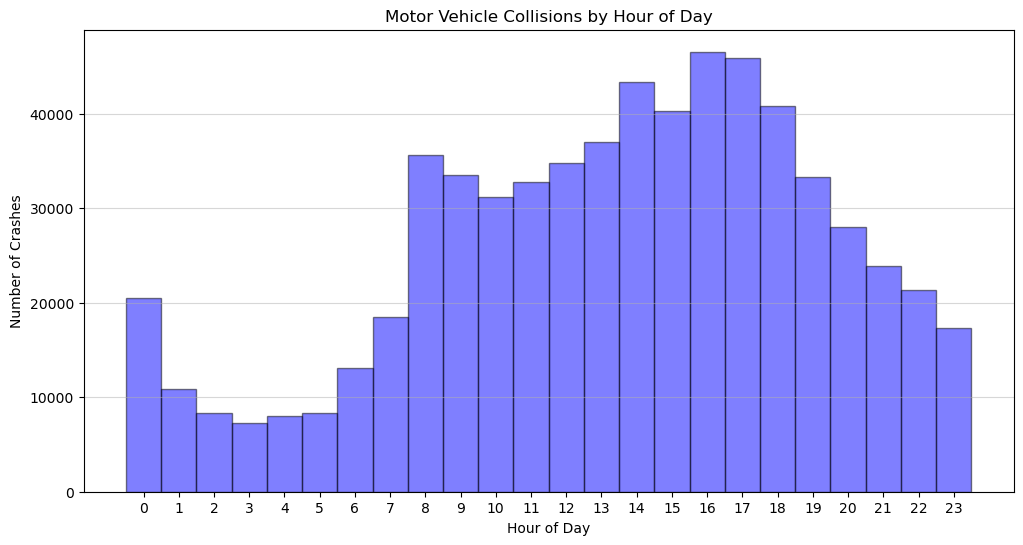

In [9]:
# Sort the time of day into hours only
data['Hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

# Plot the crashes at the time of day
plt.figure(figsize=(12, 6))
plt.hist(data['Hour'], bins=np.arange(0, 25) - 0.5, color='blue', alpha=0.5, edgecolor='black', align='mid')
plt.title('Motor Vehicle Collisions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', alpha=0.5)
plt.show()


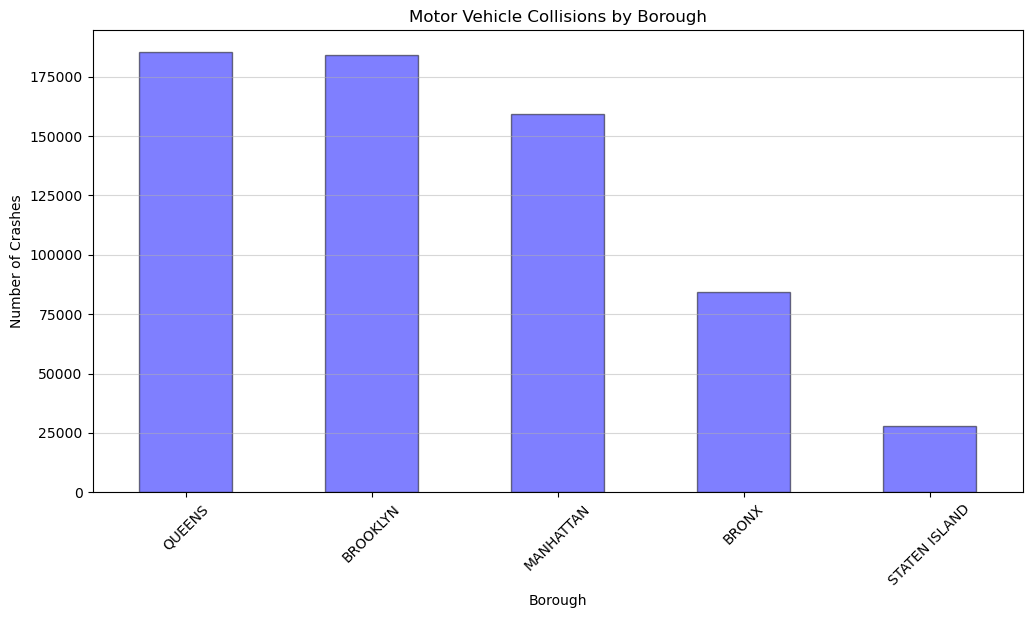

In [10]:
# Plot the crashes by borrough
plt.figure(figsize=(12, 6))
data['BOROUGH'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


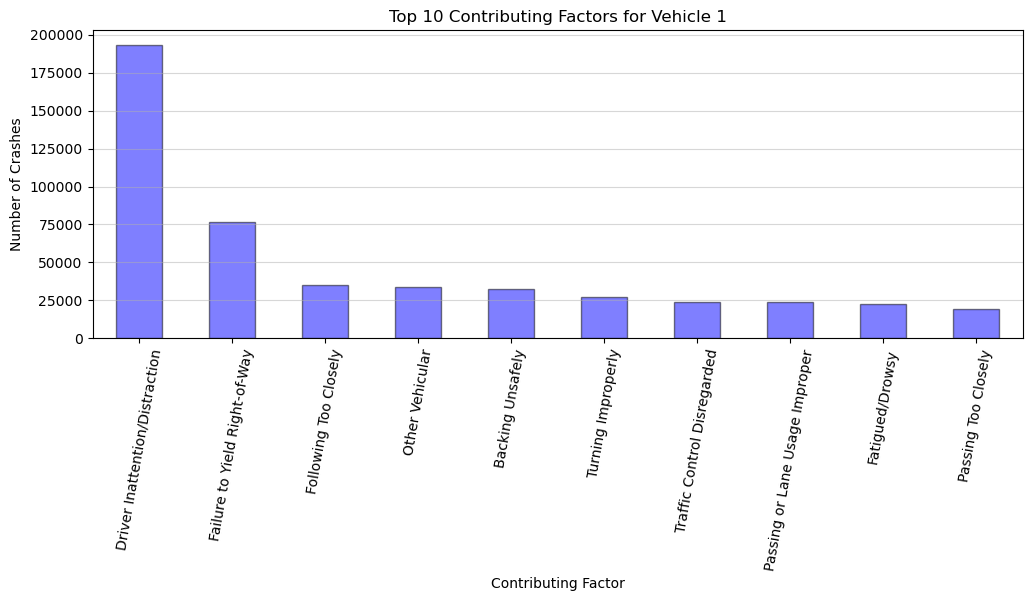

In [14]:
# Plot the crashes by contributing factor
plt.figure(figsize=(12, 4))
data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().head(10).plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Top 10 Contributing Factors for Vehicle 1')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=80)
plt.grid(axis='y', alpha=0.5)
plt.show()


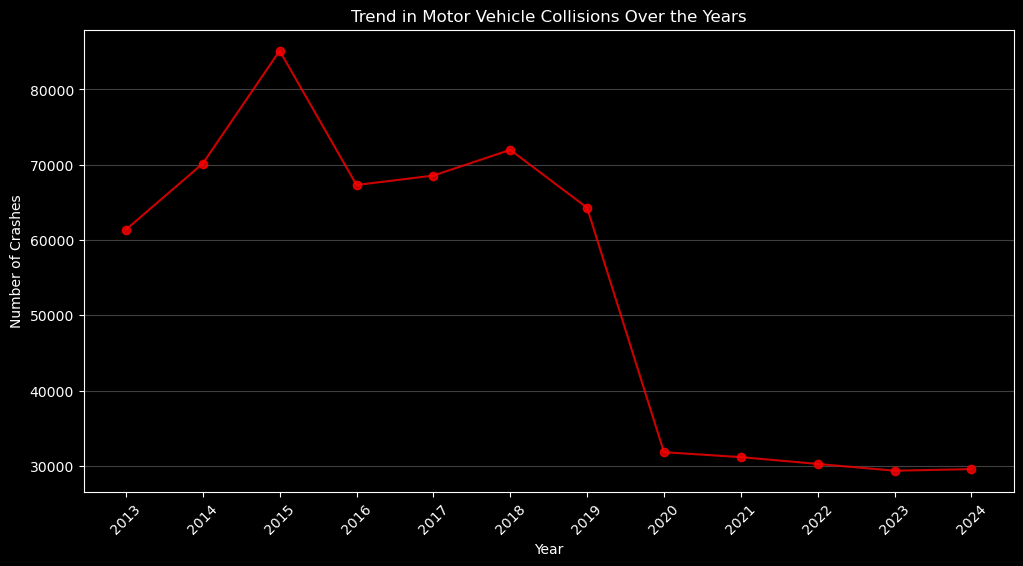

In [18]:
# Plot the trend in crashes over the years
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')  # Set the background to black
data['Year'].value_counts().sort_index().plot(kind='line', color='red', alpha=0.8, marker='o')
plt.title('Trend in Motor Vehicle Collisions Over the Years')
plt.xlabel('Year', color='white')
plt.ylabel('Number of Crashes', color='white')
plt.xticks(ticks=np.arange(data['Year'].min(), data['Year'].max() + 1, 1), rotation=45, color='white')
plt.yticks(color='white')
plt.grid(axis='y', alpha=0.5, color='gray')
plt.show()
